In [2]:
#importing all the library functions for different purposes
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
#reading excel file to extract data set from it
df = pd.read_csv('red-wine.csv')

In [4]:
df.shape

(1599, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


******Detailed description about the dataset:******
 1. When and Who created the dataset?
 
- The dataset was created by Paulo Cortez, A. Cerdeira, F. Almeida, T. Matos, and J. Reis in 2009.
   
 2. How did you get acess to the dataset?
 
- I got access to the dataset from the UCI Machine Learning Repository.
    
 3. List out the attributes (columns) of a dataset.
 
- fixed_acidity
- volatile_acidity
- citric_acid
- residual_sugar
- chlorides
- free_sulfur_dioxide
- total_sulfur_dioxide
- density
- pH
- sulphates
- alcohol
- quality (score between 0 and 10)

 
 4. Guess some probable question that dataset could answer
 
 - What is the Relationship between the physicochemical properties of wine and its sensory quality?
 - Can we predict the quality rating of wine based on its physicochemical characteristics?
 - Which specific features contribute most to the perceived quality of wine?
 
 
 5. Assess the basic fitness of the dataset.
 
 - The dataset contains physicochemical features and quality ratings of Portuguese "Vinho Verde" wines. With 11 input features and 1 output variable (quality), it's fit for classification tasks. The classes are ordered but not balanced, which can impact the performance of machine learning models, so we need to consider some strategies to handle it. Overall, it's suitable for exploring the relationship between physicochemical properties and wine quality.

# LOAD AND INSPECT DATA

In [6]:
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# DATA EXPLORATION VISUALIZATION AND CLEANING

In [7]:
df2 = df.copy()

In [8]:
df2.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [9]:
df2.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [10]:
df2.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [11]:
# Checking if there are any null values in any columns
df2.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [12]:
# Checking duplicate Rows
df2.duplicated().sum()

240

In [13]:
df2 = df2.drop_duplicates()

In [14]:
# Counting the values(classes) according to quality
df2['quality'].value_counts()

5    577
6    535
7    167
4     53
8     17
3     10
Name: quality, dtype: int64

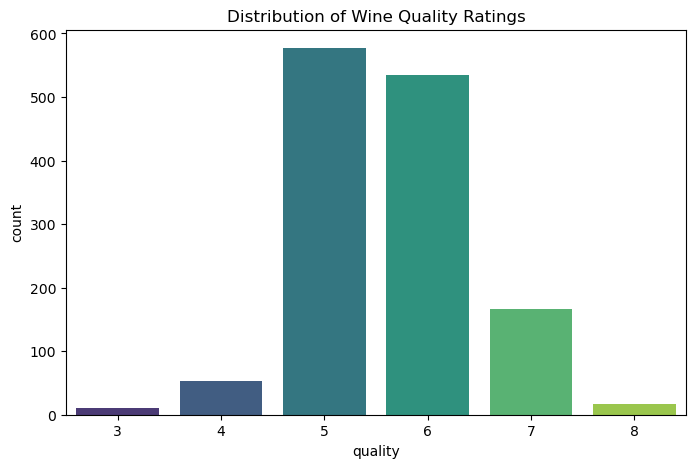

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='quality', data=df2, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

The histogram shows that wine quality ratings of 5 and 6 are the most common, with 577 and 535 instances, respectively indicating that a significant portion of the dataset consists of wines with average quality. The distribution appears slightly left-skewed as the quality ratings decrease showing that there are more instances with higher quality ratings. There is an imbalance in the distribution, with more instances concentrated around the average quality ratings of 5 and 6 compared to the extreme ratings of 3, 4, 7 and 8.

In [16]:
df2.corr()['quality'].sort_values(ascending=False)

quality                 1.000000
alcohol                 0.480343
sulphates               0.248835
citric acid             0.228057
fixed acidity           0.119024
residual sugar          0.013640
free sulfur dioxide    -0.050463
pH                     -0.055245
chlorides              -0.130988
total sulfur dioxide   -0.177855
density                -0.184252
volatile acidity       -0.395214
Name: quality, dtype: float64

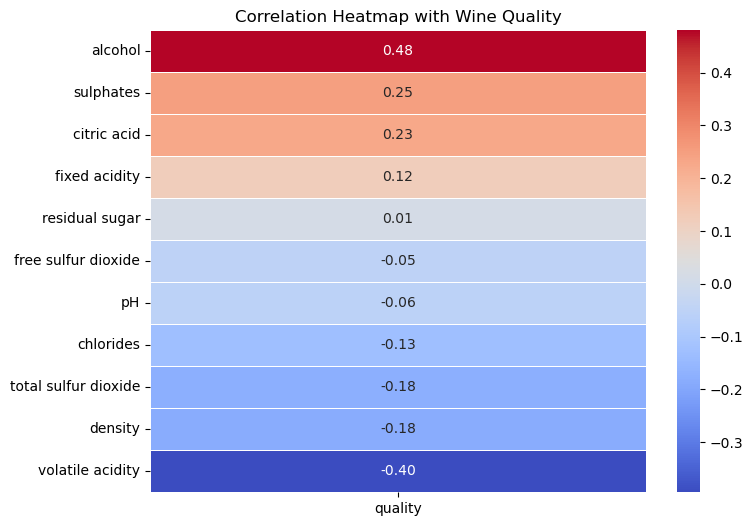

In [17]:
# Correlation heatmap for the target variable with all other features
correlation_target = df2.corr()['quality'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_target.drop('quality').to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Wine Quality')
plt.show()

The correlation heatmap analysis suggests that certain physicochemical attributes such as alcohol content, sulphates, citric acid, volatile acidity, total sulfur dioxide, chlorides, density, and pH may influence wine quality. These insights guide feature selection and further exploration in the modeling process.

#### When i used 6 as a threashold the distribution was imbalanced so i used 3 thresshold like 3,4 as (0)  5,6 as (1) and 7,8 as (2).

In [18]:
df5 = df2.copy()

In [19]:
# 0 for low quality wine
# 1 for medium quality wine
# 2 for high quality wine
df5['good_quality'] = df5['quality'].apply(lambda x: 0 if x <= 4 else (1 if x <= 6 else 2))

In [20]:
df5

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,good_quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5,1


In [21]:
df5.corr()['good_quality'].sort_values(ascending=False)

good_quality            1.000000
quality                 0.820183
alcohol                 0.358652
citric acid             0.223186
sulphates               0.208731
fixed acidity           0.123416
residual sugar          0.030053
free sulfur dioxide    -0.018943
total sulfur dioxide   -0.070284
chlorides              -0.096578
pH                     -0.097758
density                -0.128501
volatile acidity       -0.337734
Name: good_quality, dtype: float64

In [22]:
# Answer to: What is the Relationship between the physicochemical properties of wine and its sensory quality? via HeatMap and other methods
df_test = df5.copy()
# Assuming your dataset is stored in a DataFrame called df5
correlation_0 = df_test[df_test['good_quality'] == 0].corr()['quality'].drop('good_quality')
correlation_1 = df_test[df_test['good_quality'] == 1].corr()['quality'].drop('good_quality')
correlation_2 = df_test[df_test['good_quality'] == 2].corr()['quality'].drop('good_quality')

print("Correlation Matrix for good_quality == 0:")
print(correlation_0)

print("\nCorrelation Matrix for good_quality == 1:")
print(correlation_1)

print("\nCorrelation Matrix for good_quality == 2:")
print(correlation_2)


Correlation Matrix for good_quality == 0:
fixed acidity          -0.129709
volatile acidity       -0.283044
citric acid             0.005596
residual sugar          0.012681
chlorides              -0.156034
free sulfur dioxide     0.051304
total sulfur dioxide    0.158330
density                -0.203671
pH                     -0.034691
sulphates               0.043376
alcohol                 0.124405
quality                 1.000000
Name: quality, dtype: float64

Correlation Matrix for good_quality == 1:
fixed acidity           0.049372
volatile acidity       -0.240359
citric acid             0.092005
residual sugar         -0.019744
chlorides              -0.089179
free sulfur dioxide    -0.072737
total sulfur dioxide   -0.250649
density                -0.143781
pH                      0.056222
sulphates               0.151655
alcohol                 0.390012
quality                 1.000000
Name: quality, dtype: float64

Correlation Matrix for good_quality == 2:
fixed acidity       

In [23]:
# Drop the column 'quality'
df5 = df5.drop('quality', axis=1)

In [24]:
low=df5[df5.good_quality==0]
low.shape

(63, 12)

In [25]:
medium=df5[df5.good_quality==1]
medium.shape

(1112, 12)

In [26]:
high=df5[df5.good_quality==2]
high.shape

(184, 12)

In [27]:
mean_data = df5.groupby('good_quality').mean()
mean_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
good_quality,,,,,,,,,,,
0,7.871429,0.724206,0.173651,2.684921,0.095730,12.063492,34.444444,0.996689,3.384127,0.592222,10.215873
1,8.251169,0.538898,0.261286,2.484397,0.089691,16.428058,49.424910,0.996834,3.309083,0.648094,10.259173
2,8.820109,0.405870,0.372880,2.703804,0.076049,13.972826,35.358696,0.995963,3.288587,0.745598,11.552808


In [28]:
# Counting the values(classes) according to quality
df5['good_quality'].value_counts()

1    1112
2     184
0      63
Name: good_quality, dtype: int64

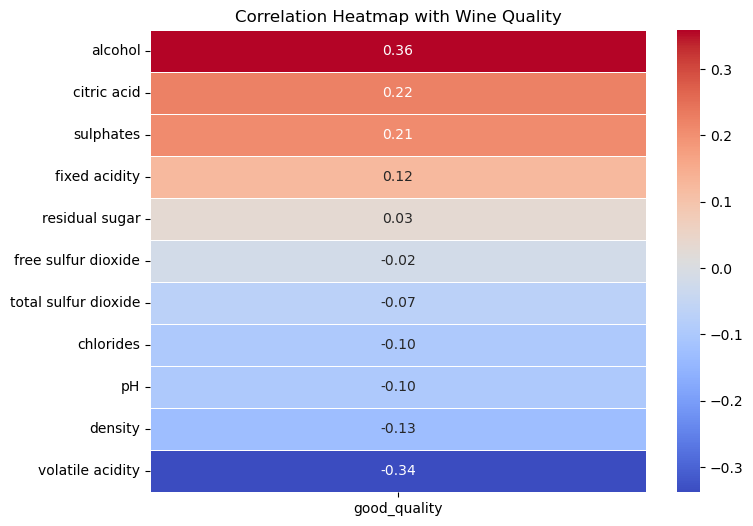

In [29]:
# Correlation heatmap for the target variable with all other features
correlation_target = df5.corr()['good_quality'].sort_values(ascending=False)
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_target.drop('good_quality').to_frame(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap with Wine Quality')
plt.show()

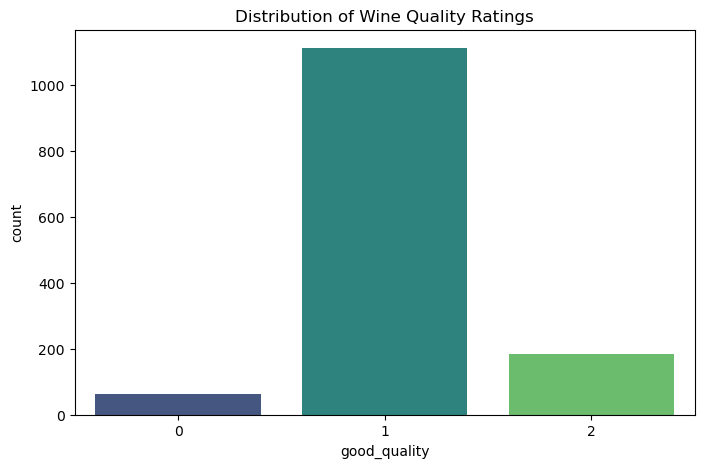

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 5))
sns.countplot(x='good_quality', data=df5, palette='viridis')
plt.title('Distribution of Wine Quality Ratings')
plt.show()

# OUTLIERS DETECTION AND REMOVAL

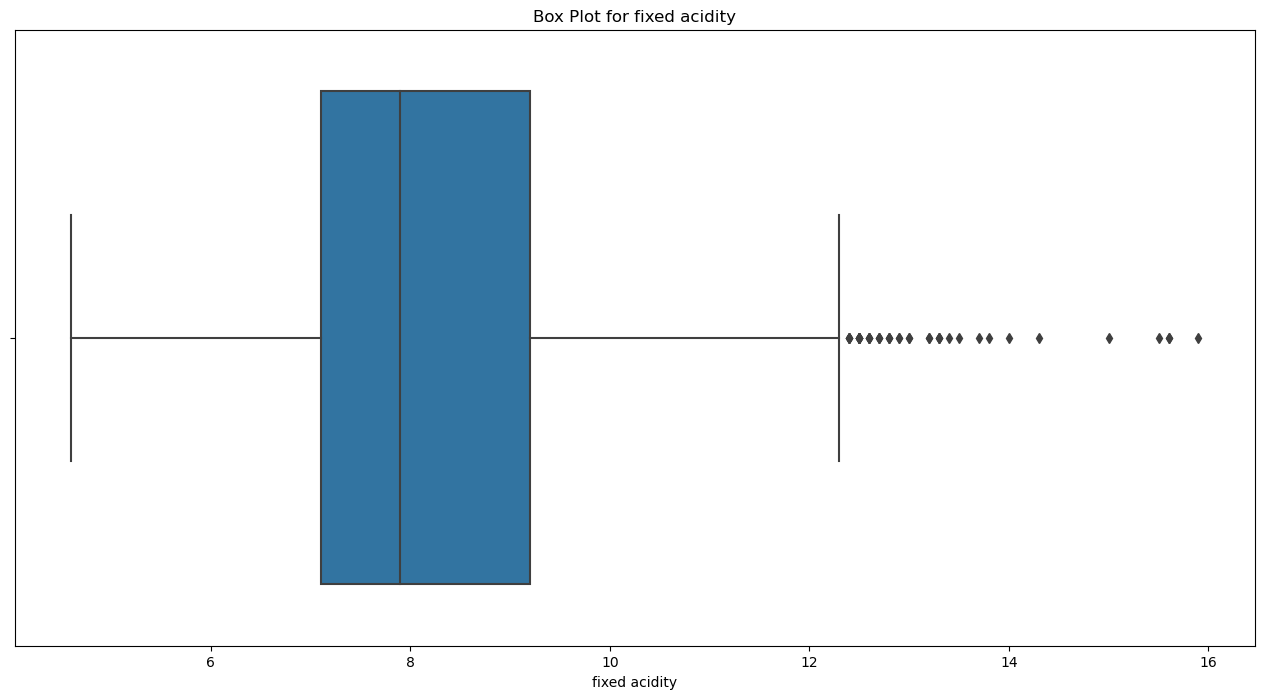

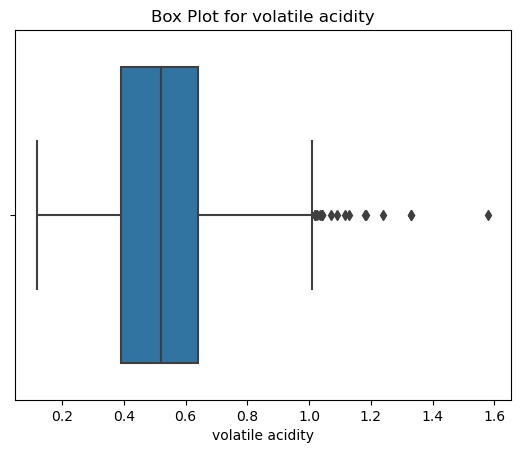

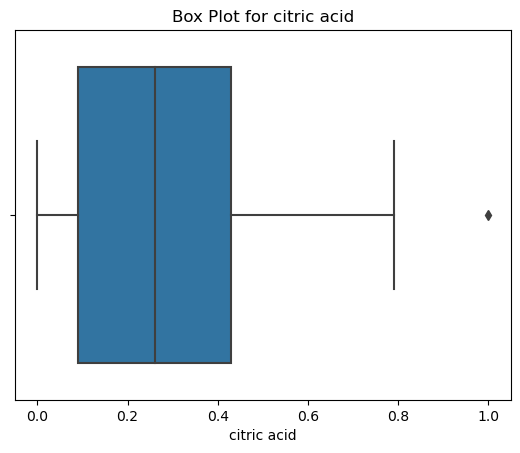

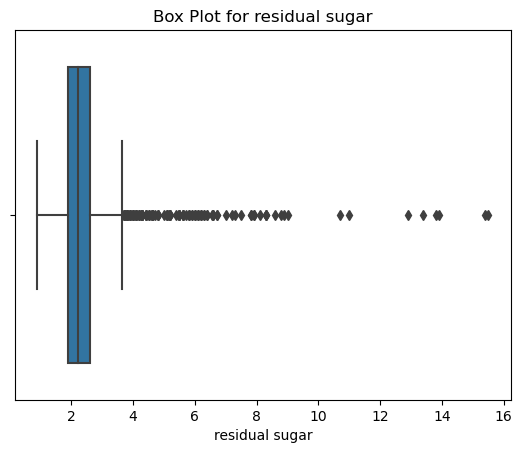

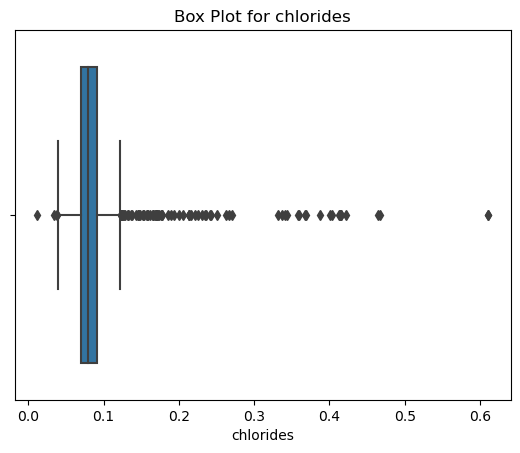

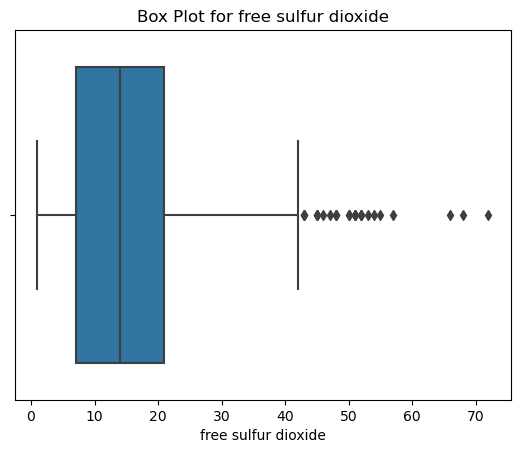

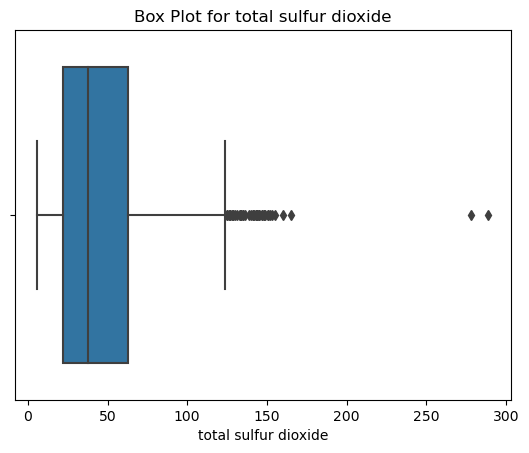

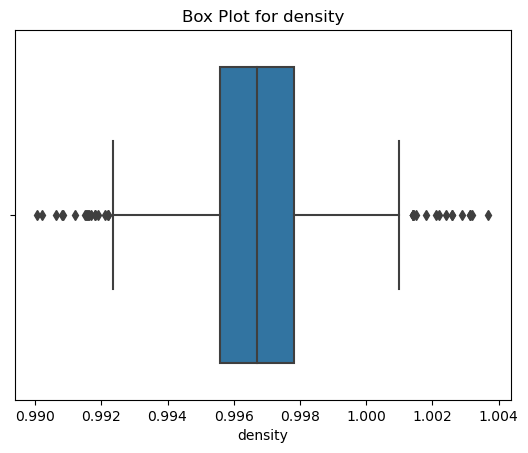

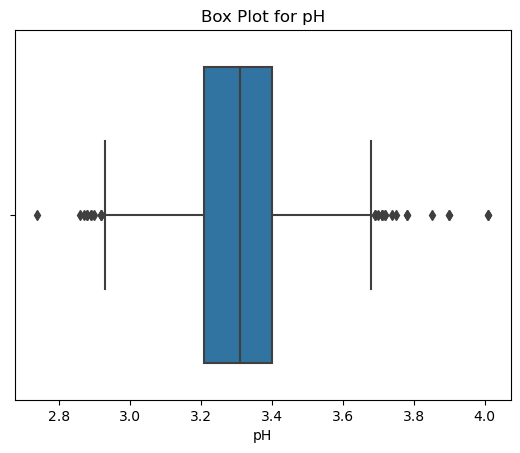

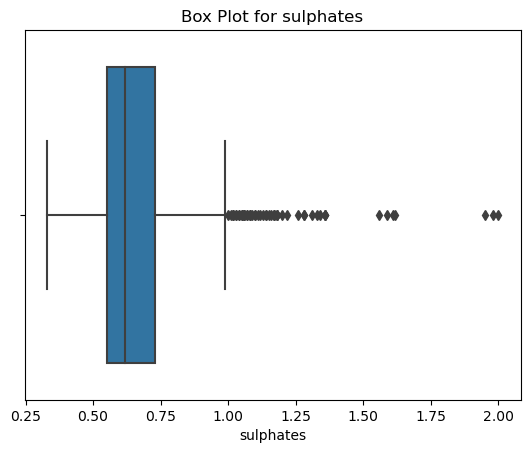

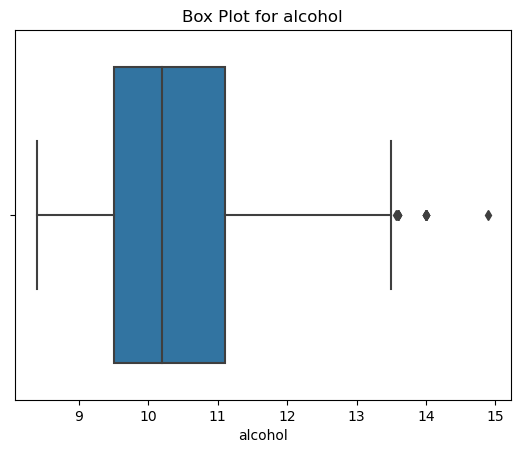

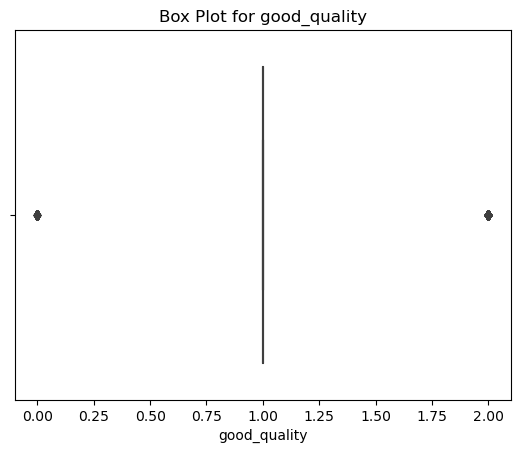

In [31]:
target_column = 'good_quality'  
plt.figure(figsize=(16, 8)) 
for column in df5.columns:
    sns.boxplot(x=column, data=df5)
    plt.title(f'Box Plot for {column}')
    plt.show()

In [32]:
dfout = df5.copy()

In [34]:
def remove_outliers(dfout, feature_names):
    df_no_outliers = dfout.copy()


    for feature_name in feature_names:
        Q1 = df_no_outliers[feature_name].quantile(0.25)
        Q3 = df_no_outliers[feature_name].quantile(0.75)
        IQR = Q3 - Q1

        # Remove outliers
        df_no_outliers = df_no_outliers[(df_no_outliers[feature_name] >= Q1 - 1.5 * IQR) & (df_no_outliers[feature_name] <= Q3 + 1.5 * IQR)]


    return  df_no_outliers 


features_to_process = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
                        'chlorides', 'free sulfur dioxide', 'total sulfur dioxide',
                        'density', 'pH', 'sulphates', 'alcohol']


# Remove outliers for all specified features
df_no_outliers  = remove_outliers(dfout, features_to_process)

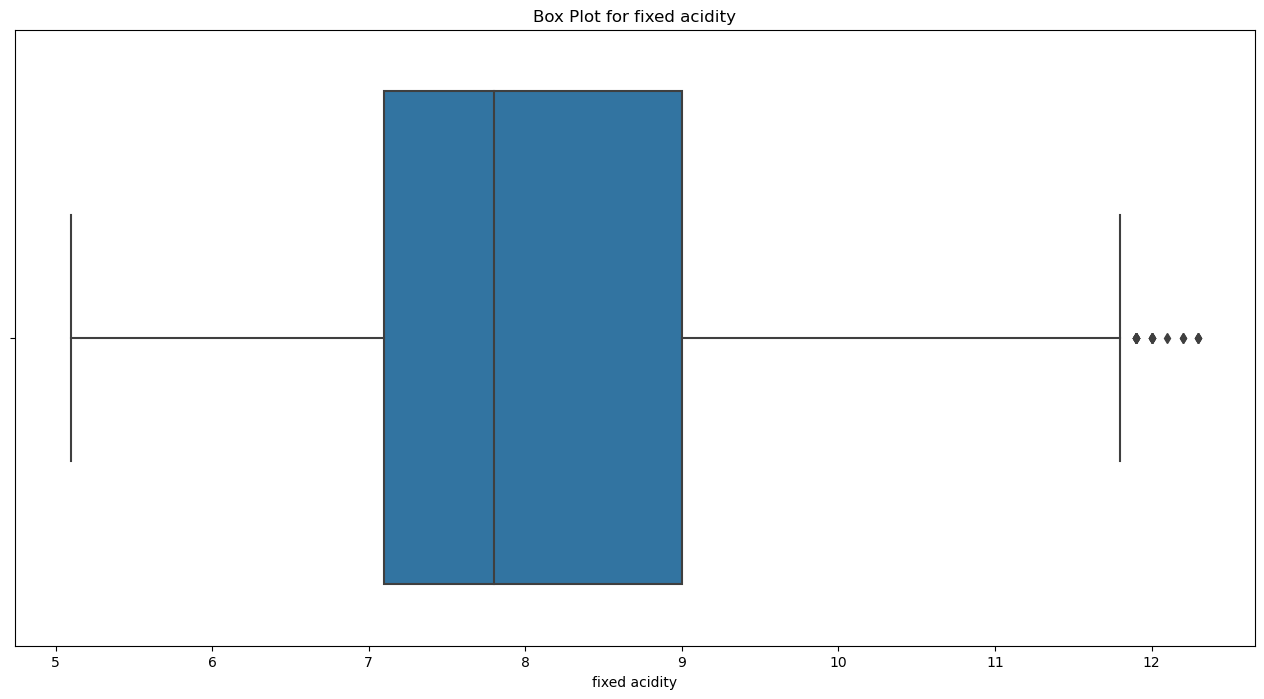

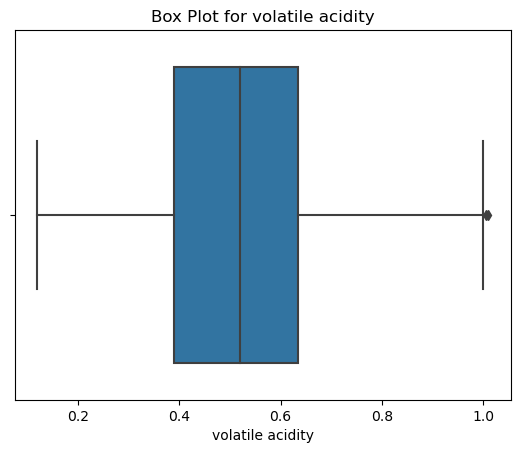

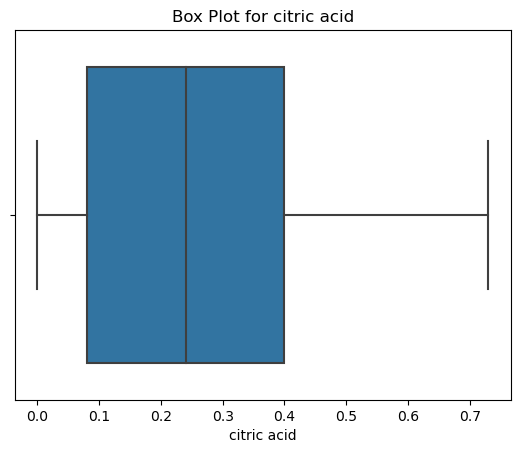

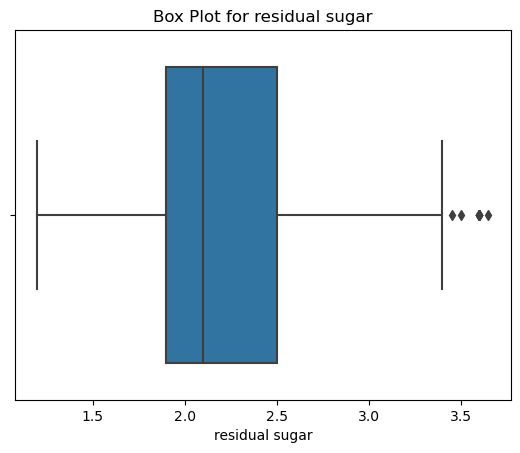

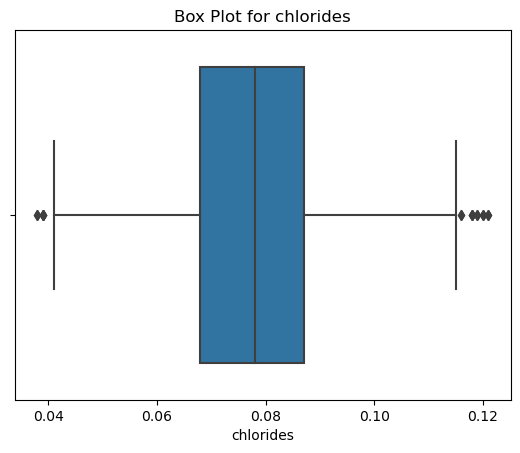

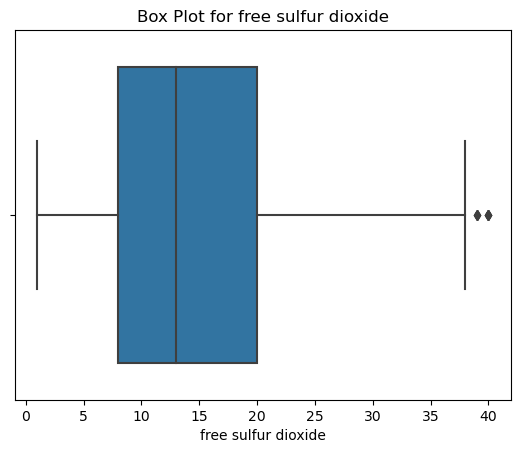

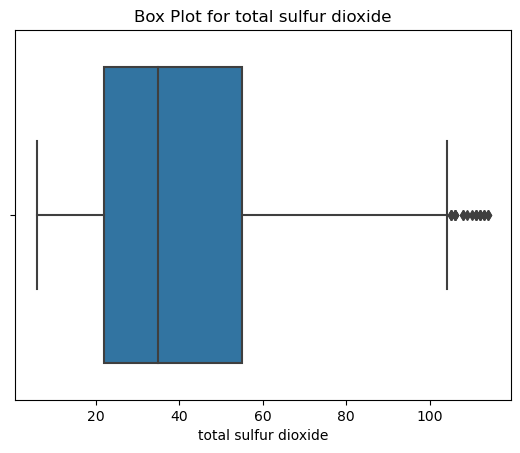

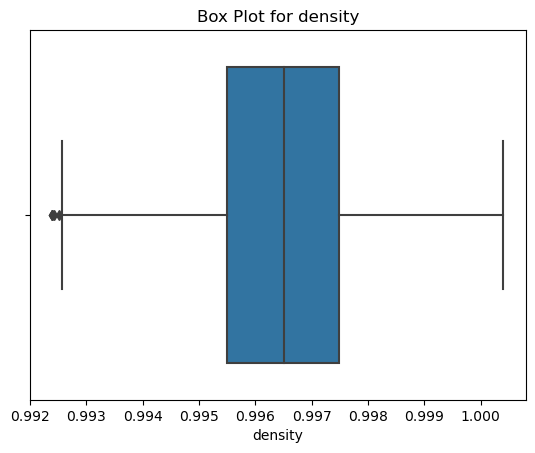

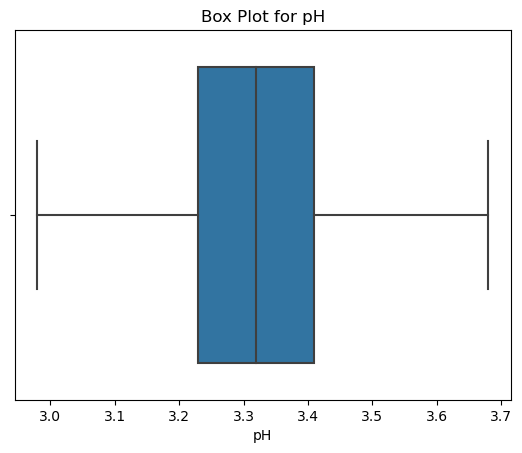

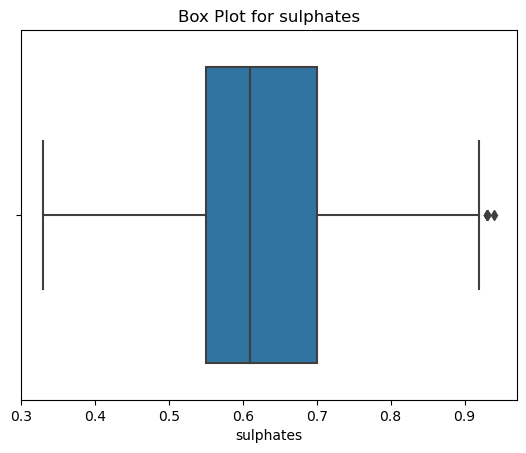

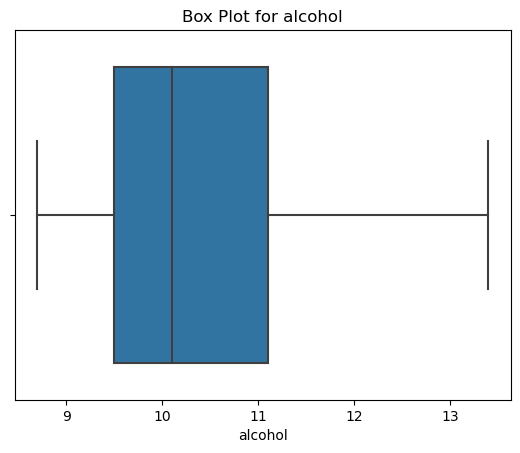

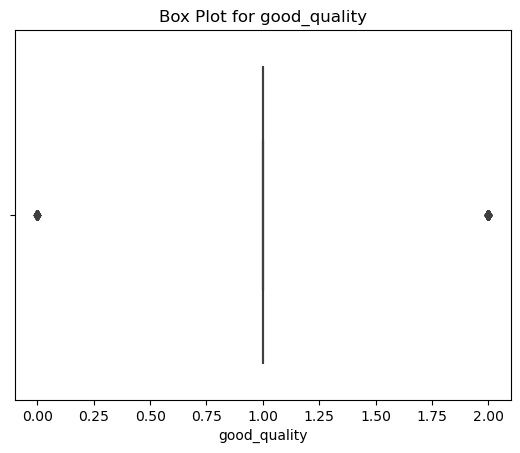

In [35]:
target_column = 'good_quality'  
plt.figure(figsize=(16, 8)) 
for column in df_no_outliers.columns:
    sns.boxplot(x=column, data=df_no_outliers)
    plt.title(f'Box Plot for {column}')
    plt.show()

In [36]:
dfout.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
good_quality            0
dtype: int64

# Train-Test Split

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Define the feature list
features = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'pH', 'sulphates', 'alcohol']

# Assuming X is your feature matrix, and y is the multi-class label column 'good_quality'
X_train, X_test, y_train, y_test = train_test_split(
    dfout[features],
    dfout['good_quality'],
    test_size=0.2,
    random_state=42
)

# Model 1: Random Forest Classifier
random_forest_model = RandomForestClassifier(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
random_forest_predictions = random_forest_model.predict(X_test)
random_forest_accuracy = accuracy_score(y_test, random_forest_predictions)
random_forest_classification_report = classification_report(y_test, random_forest_predictions,zero_division=1)

# Model 2: Support Vector Machine (SVM)
svm_model = SVC()
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_classification_report = classification_report(y_test, svm_predictions,zero_division=1)


# Compare Model Performances
print(f"Accuracy (Random Forest): {random_forest_accuracy}")
print(f"Classification Report (Random Forest):\n{random_forest_classification_report}")

print(f"\nAccuracy (Support Vector Machine): {svm_accuracy}")
print(f"Classification Report (Support Vector Machine):\n{svm_classification_report}")



Accuracy (Random Forest): 0.8639705882352942
Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        15
           1       0.86      0.99      0.92       223
           2       0.88      0.41      0.56        34

    accuracy                           0.86       272
   macro avg       0.91      0.47      0.49       272
weighted avg       0.87      0.86      0.83       272


Accuracy (Support Vector Machine): 0.8235294117647058
Classification Report (Support Vector Machine):
              precision    recall  f1-score   support

           0       1.00      0.00      0.00        15
           1       0.82      1.00      0.90       223
           2       1.00      0.03      0.06        34

    accuracy                           0.82       272
   macro avg       0.94      0.34      0.32       272
weighted avg       0.85      0.82      0.75       272



In [41]:
df_check1 = pd.DataFrame({'Actual' : y_test, 'Predicted' : random_forest_predictions})
df_check1

,Actual,Predicted
55,1,1
1291,1,1
1544,2,1
593,1,1
1261,0,1
...,...,...
1086,2,2
662,1,1
279,2,1
1111,2,1


In [42]:
df_check2 = pd.DataFrame({'Actual' : y_test, 'Predicted' : svm_predictions})
df_check2

,Actual,Predicted
55,1,1
1291,1,1
1544,2,1
593,1,1
1261,0,1
...,...,...
1086,2,1
662,1,1
279,2,1
1111,2,1


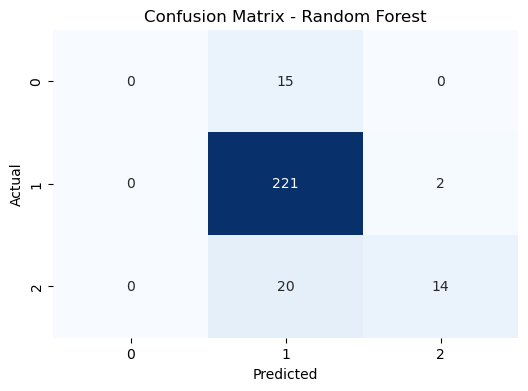

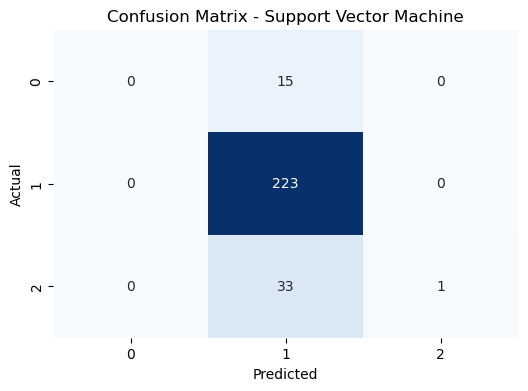

In [182]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, random_forest_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, svm_predictions)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Support Vector Machine')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


FROM REPORT WE CAN GET PRECISION, RECALL, F-1 SCORE AND SUPORT AND FROM CONFUSION MATRIX WE CAN COUNT THE NUMBER OF ERRORS THE PARTICULAR MODEL THREW ON TEST DATA

FROM THE ABOVE CLASSIFICATION REPORT FOR RANDOM FOREST AND SUPPORT VECTOR MACHINE AND CONFUSION MATRICES, ITS CONCLUDED THAT MODEL TRAINED FROM RANDOM FOREST HAS PERFORMED WELL

# Hyper-parameter Optimization with Cross-Validation

In [37]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'] 
}

# Create a RandomForestClassifier
rf_model = RandomForestClassifier()

# Instantiate the GridSearchCV object
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search.fit(X_train, y_train)

# Get the best hyperparameters
best_rf_params = grid_search.best_params_
print("Best Hyperparameters for Random Forest:")
print(best_rf_params)

Best Hyperparameters for Random Forest:
{'bootstrap': True, 'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 100}


In [38]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define the hyperparameter grid for SVM
svm_param_grid = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto']
}

# Create an SVM model
svm_model = SVC()

# Instantiate the GridSearchCV object
grid_search_svm = GridSearchCV(estimator=svm_model, param_grid=svm_param_grid, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the model to the data
grid_search_svm.fit(X_train, y_train)

# Get the best hyperparameters
best_svm_params = grid_search_svm.best_params_

print("Best Hyperparameters for SVM:")
print(best_svm_params)

Best Hyperparameters for SVM:
{'C': 1, 'gamma': 'auto', 'kernel': 'rbf'}


# Feature Selection

In [45]:
X_train = df5.drop('good_quality', axis=1)  # Features (all columns except the target)
y_train = df5['good_quality']  # Target variable

In [40]:
# Recursive Feature Elimination 

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

# Number of features to select
n_features_to_select = 5 

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE
X_train_selected = rfe.fit_transform(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features:")
print(selected_features)

Selected Features:
Index(['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates',
       'alcohol'],
      dtype='object')


In [52]:
from sklearn.feature_selection import RFE
from sklearn.svm import SVC 
from sklearn.datasets import make_classification  

model = SVC(kernel='linear')  

# Number of features to select
n_features_to_select = 5

# Initialize RFE
rfe = RFE(estimator=model, n_features_to_select=n_features_to_select)

# Fit RFE
X_train_selected = rfe.fit_transform(X_train, y_train)

# Selected features
selected_features = X_train.columns[rfe.support_]

print("Selected Features:")
print(selected_features)


Selected Features:
Index(['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol'], dtype='object')


In [183]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# X and y are the feature matrix and target variable
X = dfout[['volatile acidity', 'total sulfur dioxide', 'density', 'sulphates', 'alcohol']]
y = dfout['good_quality']    

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the Random Forest model with the best hyperparameters
rf_model = RandomForestClassifier(bootstrap=True, criterion='entropy', max_depth=10, 
                                   min_samples_leaf=4, min_samples_split=2, n_estimators=50)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy}")

# Evaluate classification report
classification_report_rf = classification_report(y_test, y_pred,zero_division=1)
print("Classification Report (SVM):\n", classification_report_rf)


Model Accuracy: 0.8419117647058824
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        15
           1       0.86      0.97      0.91       223
           2       0.65      0.38      0.48        34

    accuracy                           0.84       272
   macro avg       0.84      0.45      0.46       272
weighted avg       0.84      0.84      0.81       272



In [184]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Create a synthetic dataset
X = dfout[['volatile acidity', 'chlorides', 'pH', 'sulphates', 'alcohol']]
y = dfout['good_quality']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Assume you have selected features and hyperparameters
selected_feature_indices = [1, 2, 3]  # Adjust these indices based on your actual data
svm_hyperparameters = {
    'C': 1,
    'gamma': 'auto',
    'kernel': 'rbf'
}

# Use selected features for training and testing
X_train_selected = X_train.iloc[:, selected_feature_indices]
X_test_selected = X_test.iloc[:, selected_feature_indices]

# Create an SVM model with hyperparameters
svm_model = SVC(**svm_hyperparameters)

# Train the SVM model
svm_model.fit(X_train_selected, y_train)

# Make predictions on the test set
y_pred1 = svm_model.predict(X_test_selected)

# Evaluate the model performance
accuracy = accuracy_score(y_test, y_pred1)
print(f'Accuracy: {accuracy}')

# Evaluate classification report
classification_report_rf = classification_report(y_test, y_pred1,zero_division=1)
print("Classification Report (SVM):\n", classification_report_rf)

Accuracy: 0.8198529411764706
Classification Report (SVM):
               precision    recall  f1-score   support

           0       1.00      0.00      0.00        15
           1       0.82      1.00      0.90       223
           2       1.00      0.00      0.00        34

    accuracy                           0.82       272
   macro avg       0.94      0.33      0.30       272
weighted avg       0.85      0.82      0.74       272



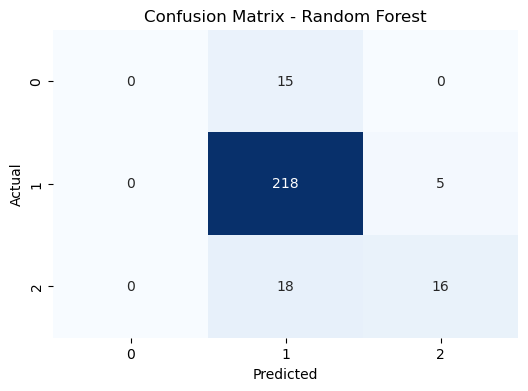

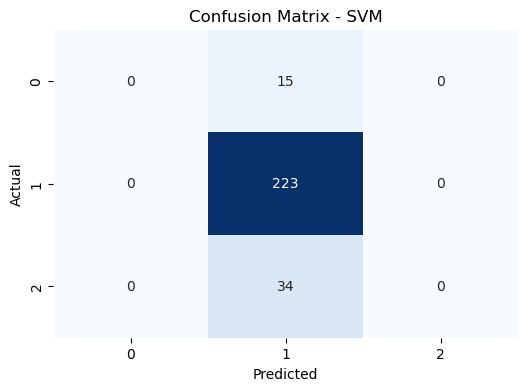

In [58]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Confusion Matrix for Random Forest
conf_matrix_rf = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


# Confusion Matrix for SVM
conf_matrix_svm = confusion_matrix(y_test, y_pred1)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix - SVM')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# FINAL MODEL

In [59]:
rf_model

RandomForestClassifier(criterion='entropy', max_depth=10, min_samples_leaf=4,
                       n_estimators=50)

In [60]:
svm_model

SVC(C=1, gamma='auto')

# CONCLUSION

The model performance in Section 3.1.2 was assessed using various machine learning algorithms, including Random Forest Classifier and Support Vector Machine (SVM) as a primary model. The accuracy, precision, recall, and F1-score metrics were used to evaluate the models before and after Hyperparameter tuning. Cross-validation was employed to robustly assess the model's performance and generalize well to unseen data since it helps in estimating how the model will perform on new, unseen data. Feature selection techniques, such as Recursive Feature Elimination (RFE), were applied to identify the most important features contributing to the model's predictive power.The accuracy of both the models before and after hyper parameter tuning seems to be slightly similar on both Random Forest and SVM. In conclusion, Grid Search CV gave less predictive error than randomized searchCV and by looking the accuracy and the less predecctive error for this particular dataset Random Forest is suitable with less error than SVM.
The experiment highlighted the significance of cross-validation for reliable performance metrics and the impact of feature selection on model interpretability. Understanding feature importance enhances focus on relevant variables, potentially improving efficiency. Future directions include exploring advanced feature engineering, diverse ML algorithms, hyperparameter tuning, and investigating ensemble methods and deep learning. Continuous monitoring, adaptation to changing data patterns, and regular model updates with refined features are crucial for sustained performance improvement.